<a href="https://colab.research.google.com/github/hws2002/MachineLearning_PytorchNScikitLearn/blob/master/chapter2/chapter2_iris_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
# This mounts your Google Drive to the Colab VM.
from google.colab import drive
drive.mount('/content/drive')

FOLDERNAME = 'Colab Notebooks/pyml/'
assert FOLDERNAME is not None, "[!] Enter the foldername."

import sys
sys.path.append('/content/drive/My Drive/{}'.format(FOLDERNAME))
%cd /content/drive/My\ Drive/$FOLDERNAME

%load_ext autoreload
%autoreload 2

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/Colab Notebooks/pyml


In [ ]:
from utils.plot_decision_regions import plot_decision_boundary

In [ ]:
### 이전 코드
class Perceptron:
  def __init__(self, eta = 0.01, n_iter = 500, random_state = 1, scale = 0.01):
    self.eta = eta
    self.n_iter = n_iter
    self.random_state = random_state
    self.scale_ = scale

  def fit(self, X, y):
    rng = np.random.default_rng(self.random_state)
    self.w_ = rng.normal(loc = 0.0, scale = self.scale_, size = X.shape[1])
    self.b_ = np.float_(0)
    self.errors_ = []

    for _ in range(self.n_iter):
      error = 0
      for xi, target in zip(X,y):
        update = self.eta*(target - self.predict(xi))
        self.w_ += update * xi
        self.b_ += update
        error += (int) (update != 0.0)
      self.errors_.append(error)
      if(error <=0 ):
        break
    return self

  def net_input(self,X):
    return np.dot(X, self.w_) + self.b_

  def predict(self, X):
    return np.where( self.net_input(X) >= 0.0, 1, 0)

In [ ]:
# 우선 데이터를 읽어와보자
s = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
print('From URL:', s)
df = pd.read_csv(s,
                header=None,
                encoding='utf-8')

From URL: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data


In [ ]:
# 먼저 df.info() 로 어떠한 데이터셋인지 살펴보자
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       150 non-null    float64
 1   1       150 non-null    float64
 2   2       150 non-null    float64
 3   3       150 non-null    float64
 4   4       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
# 대충 4개의 feature를 가지고 있다고 판단할 수 있다. 직접 값을을 봐보자
df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [ ]:
print('max and min value for ')
for i in range(4):
  print(f'feature num{i} : {df.iloc[:,i].max()} , {df.iloc[:,i].min()}')

max and min value for 
feature num0 : 7.9 , 4.3
feature num1 : 4.4 , 2.0
feature num2 : 6.9 , 1.0
feature num3 : 2.5 , 0.1


In [ ]:
# 대충 저정도 값들을 가졌으므로, normalization 같은건 아직 적용할 필요가 없다
# 거의 바로 활용해도 될 수준
# 일단은 50개의 Iris-setosa와 50개의 Iris-versicolor 에 해당하는 처음 100개의 클래스 테이블을 추출해보자.
y = df.iloc[:100,4].to_numpy()
y

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versic

In [ ]:
# dtype 이 object인 상태로 퍼셉트론에서 훈련시키는것은 매우 바보같은 짓이므로, int 형식으로 바꿔주자
y = np.where(y == 'Iris-setosa', 1, 0)
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
x = df.iloc[:100, [0,2]]
x

,0,2
0,5.1,1.4
1,4.9,1.4
2,4.7,1.3
3,4.6,1.5
4,5.0,1.4
...,...,...
95,5.7,4.2
96,5.7,4.2
97,6.2,4.3
98,5.1,3.0


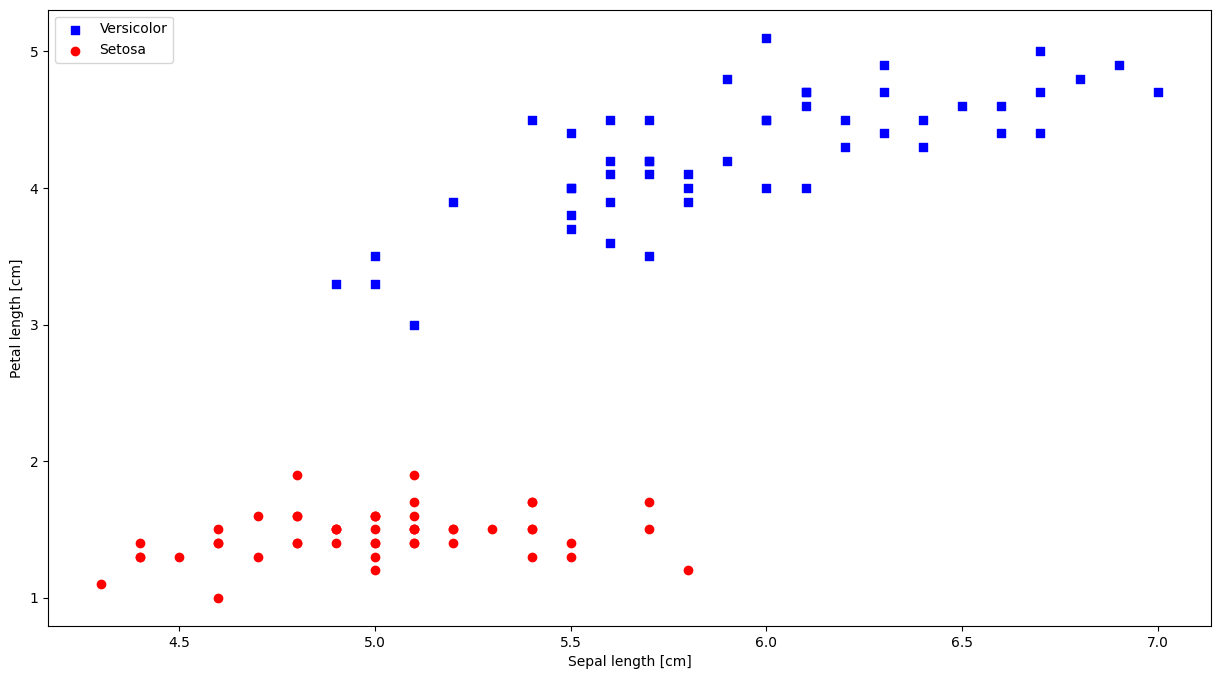

In [ ]:
# x 의 경우에는 첫번쨰 특성과 세번째 특성만 추출하여 사용해보자 (dimension 이 높으면, scatter plot 그리기 까다로우므로 (사실 3d로도 가능하긴해))
x = df.iloc[:100,[0,2]].to_numpy()

fig, ax = plt.subplots(figsize = (15,8))
colors = ['b','r']
labels = ['Versicolor','Setosa']
markers = ['s','o']

for c in np.unique(y):
  mask = (y == c)
  ax.scatter( x[mask,0], x[mask,1], color = colors[c], marker = markers[c], label = f'{labels[c]}')

plt.xlabel('Sepal length [cm]') # <=> ax.set_xlabel('Sepal length [cm]')
plt.ylabel('Petal length [cm]')
plt.legend(loc = 'upper left')
plt.show()

############################ Alternative way to achieve same goal ############################
# plt.scatter(x[:50, 0], x[:50,1], color = 'red', marker = 'o', label = 'Setosa')
# plt.scatter(x[50:100, 0], x[50:100,1], color = 'blue', marker = 's', label = 'Versicolor')

[1, 3, 3, 2, 1, 0, 0, 0, 0]


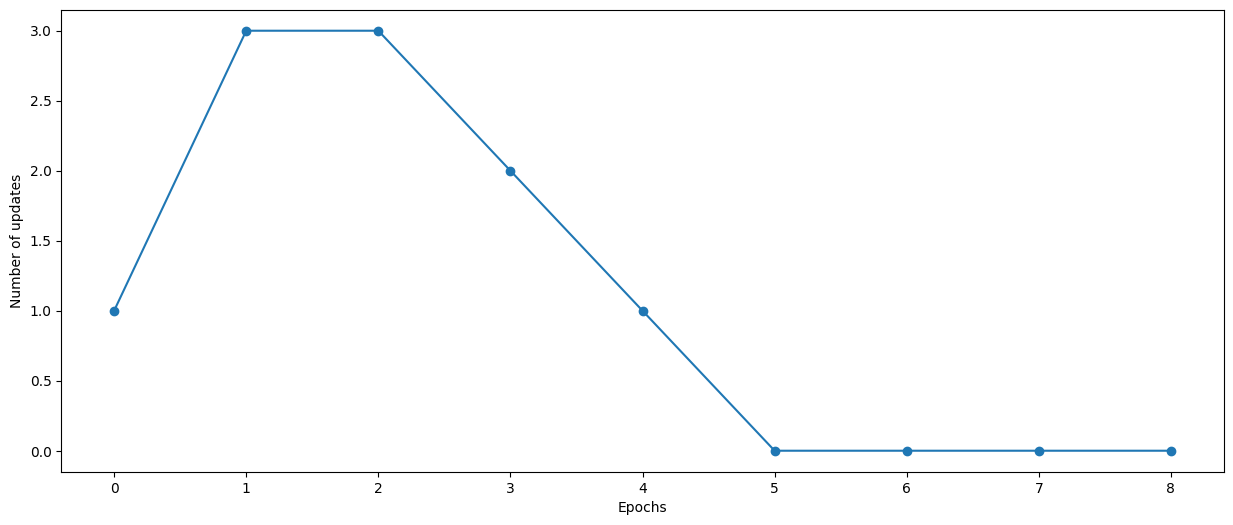

In [ ]:
# 에포크 대비 잘못 분류된 오차를 그래프로 그려서,
# 알고리즘이 수렴하여 두 붗꽃 클래스를 구분하는 결정 경게를 찾는지 확인해보자
epoch = 100
eta = 0.1
ppn = Perceptron(eta = eta, n_iter = epoch)
errors = ppn.fit(x,y).errors_
fig, ax = plt.subplots(figsize = (15,6))
for _ in range(3):
  errors.append(0)

print(errors)

# line플랏으로 그려야지
ax.plot( np.arange(0,len(errors),1), errors, marker = 'o')
# or
# ax.plot( range(1, len(errors) + 1), errors, marker = 'o')

ax.set_xlabel('Epochs')
ax.set_ylabel('Number of updates')
plt.show()

# 수렴
5 번째 epoch 이후에 수렴했고, 훈련 샘플을 완벽하게 분류했음을 알 수 있음.
이제 2차원 데이터셋의 결정경계를 contourf 로 시각화해보자

In [ ]:
from matplotlib.colors import ListedColormap

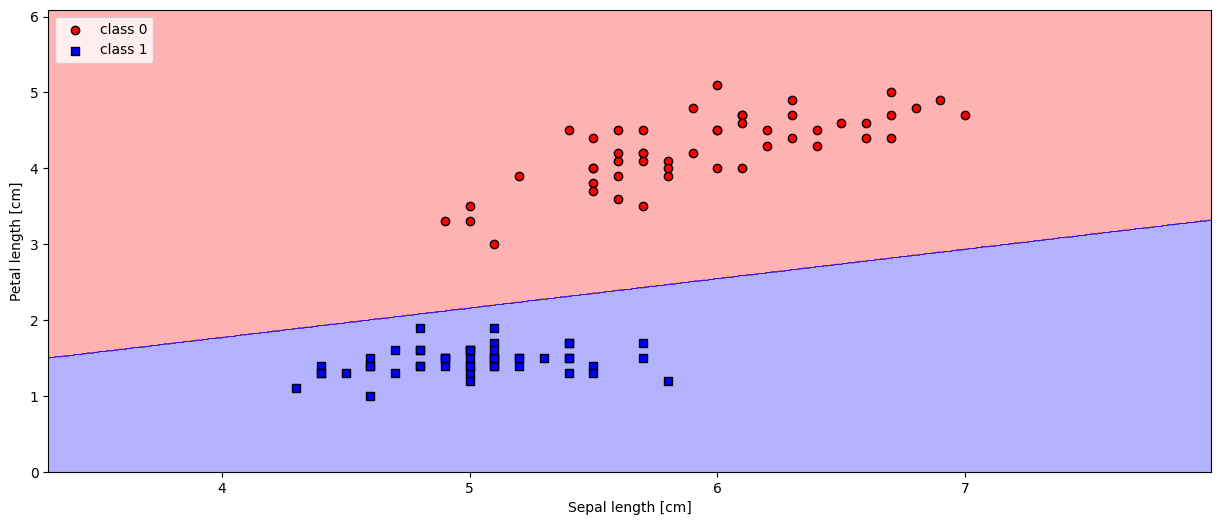

In [ ]:
# set markers and colormap
markers = ('o' , 's', '^', 'v', '<')
colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
cmap = ListedColormap(colors[:len(np.unique(y))])
resolution = 1/100

fig,ax = plt.subplots(figsize = (15,6))

# draw decision boundary
x1_min , x1_max = np.min(x[:,0]) - 1, np.max(x[:,0]) + 1
x2_min , x2_max = np.min(x[:,1]) - 1, np.max(x[:,1]) + 1

xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                       np.arange(x2_min, x2_max, resolution)
                      )

lab = ppn.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
lab = lab.reshape(xx1.shape)

# use contourf
plt.contourf(xx1,xx2,lab, alpha = 0.3, cmap = cmap)
plt.xlim(xx1.min(), xx1.max())
plt.ylim(xx2.min(), xx2.max())

# draw scatter plot
for idx, cls in enumerate(np.unique(y)):
  ax.scatter(x[ y == cls,0],
             x[ y == cls,1],
             c = colors[idx],
             marker = markers[idx],
             label = f'class {cls}',
             edgecolor = 'black'
            )

plt.xlabel('Sepal length [cm]')
plt.ylabel('Petal length [cm]')
plt.legend(loc = 'upper left')
plt.show()

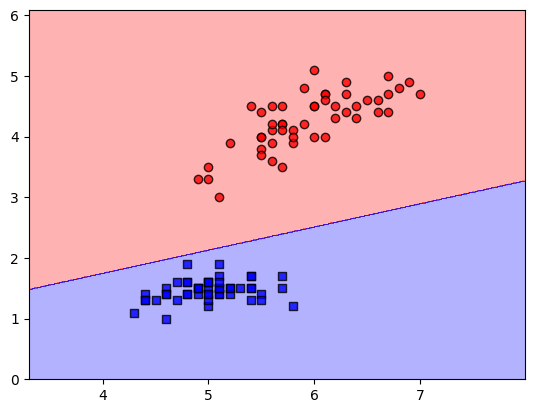

In [ ]:
ppn = Perceptron(eta = 0.5, n_iter = 20)
ppn.fit(x,y)
plot_decision_boundary(x, y, ppn)